
Author: Giacomo Rossi

Repository: [1giacomo/xtream-ai-assignment](https://github.com/1giacomo/xtream-ai-assignment)

LinkedIn: [giacomo-rossi-100](https://www.linkedin.com/in/giacomo-rossi-100/)

[Go to Challenge 2](https://colab.research.google.com/drive/1ty0Bml_yJkIVHd5-rGTN3MOUnqgRRQ5J)

# Challenge 1: What makes a diamond valuable?

Francesco wonders: what makes a diamond valuable? You should provide him with an answer.

Don Francesco has been very clear with you: he is not a fan of tech jargon, so keep your message plain and simple. However, he trusts no one - certainly not you. He's hired Luca, another data scientist, to double-check your findings (no pressure!). Your mission is simple.

Create a Jupyter notebook to explain what Francesco should look at and why. Your code should be understandable by a data scientist like Luca, but your text and visualizations should be clear for a layman like Francesco.

## Load the dataset

In [92]:
import pandas as pd

In [93]:
# UNCOMMENT THIS BLOCK IF YOU RUN LOCAL

# Load the dataset from the .csv file
# diamonds = pd.read_csv("./datasets/diamonds/diamonds.csv")

In [94]:
# REMOVE THIS BLOCK IF YOU RUN LOCAL

# Clone the dataset from Github
!git clone https://github.com/1giacomo/xtream-ai-assignment.git

# Load the dataset from the .csv file
diamonds = pd.read_csv("./xtream-ai-assignment/datasets/diamonds/diamonds.csv")

fatal: destination path 'xtream-ai-assignment' already exists and is not an empty directory.


In [95]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.10,Ideal,H,SI2,62.0,55.0,4733,6.61,6.65,4.11
1,1.29,Ideal,H,SI1,62.6,56.0,6424,6.96,6.93,4.35
2,1.20,Premium,I,SI1,61.1,58.0,5510,6.88,6.80,4.18
3,1.50,Ideal,F,SI1,60.9,56.0,8770,7.43,7.36,4.50
4,0.90,Very Good,F,VS2,61.7,57.0,4493,6.17,6.21,3.82
...,...,...,...,...,...,...,...,...,...,...
4995,0.38,Ideal,H,VVS2,62.3,53.3,832,4.65,4.69,2.91
4996,0.33,Premium,G,VVS2,61.3,59.0,927,4.45,4.42,2.72
4997,1.25,Ideal,J,VVS2,62.1,56.0,5980,6.81,6.84,4.24
4998,0.31,Premium,F,VS2,62.9,58.0,802,4.31,4.27,2.70


## What does this dataset look like?

I'd like to start with some raw **Data Visualizzation** to understand how is

First of all I notice:

* Some points on the ```y=0 axes```
* Some random point out of the distrubution
* Mysterious points on ```carat=4``` and ```carat=3```

### My thoughts

* The points on the ```price=0 axes``` can be errors in the dataset.
* I have to investigate on the outliers.

<Axes: xlabel='carat', ylabel='price'>

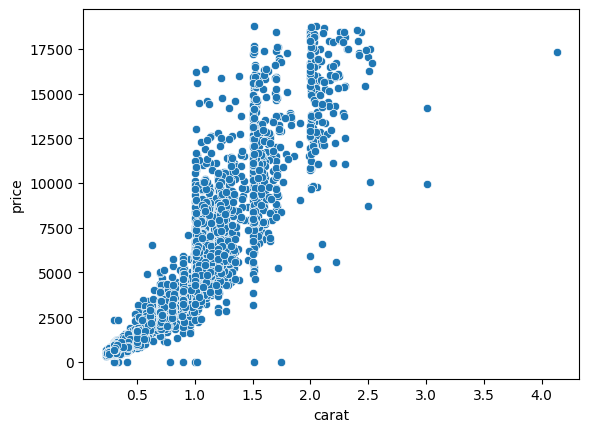

In [96]:
import seaborn as sns

sns.scatterplot(x='carat', y='price', data=diamonds)

## Are there any other errors in the dataset?

Let's print the dataset description and find it out.

I find out:

* Diamonds with ```price=0```
* Diamonds with ```x=0```, ```y=0```, ```z=0```


In [97]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,0.794486,61.711660,57.447060,3925.53940,5.725188,5.727744,3.533076
std,0.468424,1.446206,2.258999,3975.45212,1.119156,1.112106,0.690334
min,0.230000,44.000000,51.600000,-1.00000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,936.00000,4.700000,4.710000,2.900000
50%,0.700000,61.800000,57.000000,2392.50000,5.690000,5.700000,3.530000
75%,1.040000,62.500000,59.000000,5369.25000,6.540000,6.540000,4.030000
max,4.130000,70.200000,95.000000,18787.00000,10.000000,9.850000,6.430000


### How many of them?

* 10 diamonds with ```price=0```
* 1 diamond with ```x=0```, ```y=0```, ```z=0```

Not that much, I can remove them from the dataset.

In [98]:
diamonds[diamonds['price']<=0]

,carat,cut,color,clarity,depth,table,price,x,y,z
331,1.00,Good,F,SI1,64.1,60.0,-1,6.25,6.19,3.99
2121,0.34,Ideal,E,VS2,59.8,56.0,-1,4.55,4.54,2.72
2484,1.75,Ideal,J,SI1,63.3,59.0,-1,7.63,7.57,4.81
2933,1.51,Ideal,H,VS2,62.5,55.0,-1,7.29,7.34,4.57
3155,0.31,Ideal,G,VS2,61.7,57.0,-1,4.33,4.36,2.68
3317,1.02,Premium,D,VS2,59.8,61.0,-1,6.61,6.54,3.93
3445,0.30,Premium,H,SI1,59.3,59.0,-1,4.38,4.36,2.59
3904,0.90,Very Good,G,SI2,64.2,56.0,-1,6.04,6.11,3.90
3980,0.41,Very Good,H,VS2,63.4,58.0,-1,4.77,4.66,2.99
4188,0.79,Ideal,H,VVS1,62.0,56.0,-1,5.92,5.96,3.68


In [99]:
diamonds[diamonds['x']<=0]

,carat,cut,color,clarity,depth,table,price,x,y,z
4321,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.0,0.0


In [100]:
cleaned_diamonds = diamonds[diamonds['price'] > 0][diamonds['x'] > 0][diamonds['y'] > 0][diamonds['z'] > 0]
cleaned_diamonds = cleaned_diamonds[cleaned_diamonds['table'] != 95][cleaned_diamonds['depth'] != 44][cleaned_diamonds['z'] != 1.41]

<ipython-input-100-374194538db7>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_diamonds = diamonds[diamonds['price'] > 0][diamonds['x'] > 0][diamonds['y'] > 0][diamonds['z'] > 0]
<ipython-input-100-374194538db7>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_diamonds = cleaned_diamonds[cleaned_diamonds['table'] != 95][cleaned_diamonds['depth'] != 44][cleaned_diamonds['z'] != 1.41]


## What is the result of this "data cleaning"?

In [101]:
cleaned_diamonds.describe()

,carat,depth,table,price,x,y,z
count,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000
mean,0.793708,61.715223,57.439892,3927.497393,5.725277,5.727902,3.533718
std,0.467714,1.423313,2.195956,3969.001513,1.115732,1.108673,0.687676
min,0.230000,53.000000,51.600000,351.000000,3.860000,3.840000,2.350000
25%,0.400000,61.000000,56.000000,942.000000,4.700000,4.710000,2.900000
50%,0.700000,61.800000,57.000000,2396.000000,5.690000,5.700000,3.525000
75%,1.040000,62.500000,59.000000,5371.750000,6.540000,6.530000,4.030000
max,4.130000,70.200000,70.000000,18787.000000,10.000000,9.850000,6.430000


## How can I use also the non-numerical data?

There are 3 non-numerical column ```cut```, ```color``` and ```clarity```, they are called categorical variables, but we can do something for treat them as linear variables.

**For the purpose of the exercise I assume all the categorical variables can be transformed in linear variables.** Beacause I can't find precise informations online, like "VVS1 is X10 times better then VVS2".

#### Extras:

I found that the colour range is D-J, but I mapped all the colours so that this script can also work with another dataset.

In [102]:
cut_mapping_dict = {
    "Ideal": 4,
    "Premium": 3,
    "Very Good": 2,
    "Good": 1,
    "Fair": 0,
}

clarity_mapping_dict = {
    "IF": 7,
    "VVS1": 6,
    "VVS2": 5,
    "VS1": 4,
    "VS2": 3,
    "SI1": 2,
    "SI2": 1,
    "I1": 0
}

In [103]:
cleaned_diamonds['cut'] = cleaned_diamonds['cut'].replace(cut_mapping_dict)
cleaned_diamonds['color'] = cleaned_diamonds['color'].apply(lambda x: ord('Z') - ord(x))
cleaned_diamonds['clarity'] = cleaned_diamonds['clarity'].replace(clarity_mapping_dict)
cleaned_diamonds.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000
mean,0.793708,2.901524,19.392700,3.059166,61.715223,57.439892,3927.497393,5.725277,5.727902,3.533718
std,0.467714,1.120847,1.691628,1.632269,1.423313,2.195956,3969.001513,1.115732,1.108673,0.687676
min,0.230000,0.000000,16.000000,0.000000,53.000000,51.600000,351.000000,3.860000,3.840000,2.350000
25%,0.400000,2.000000,18.000000,2.000000,61.000000,56.000000,942.000000,4.700000,4.710000,2.900000
50%,0.700000,3.000000,19.000000,3.000000,61.800000,57.000000,2396.000000,5.690000,5.700000,3.525000
75%,1.040000,4.000000,21.000000,4.000000,62.500000,59.000000,5371.750000,6.540000,6.530000,4.030000
max,4.130000,4.000000,22.000000,7.000000,70.200000,70.000000,18787.000000,10.000000,9.850000,6.430000


## Now we are ready to visualize the data

### How much do carats affect price?

Seems really relevant.

<Axes: xlabel='carat', ylabel='price'>

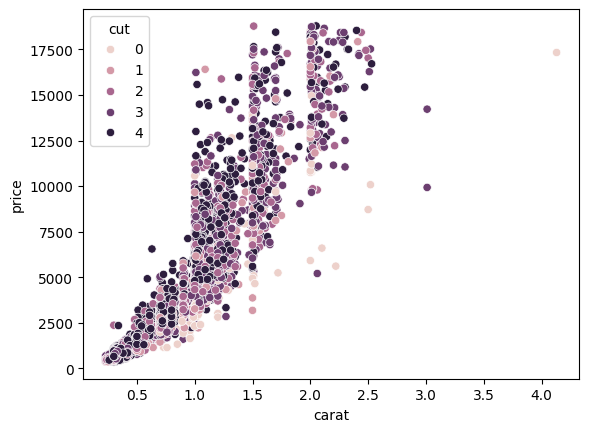

In [104]:
sns.scatterplot(x='carat', y='price', hue='cut', data=cleaned_diamonds)

### How much do size affect price?

The visualizzation appears almost the same. This is becuase size and price are related.

Because **1 carat = 0.20 grams**.

Of course because a bigger diamond has a bigger mass (and more carats).

<Axes: xlabel='size', ylabel='price'>

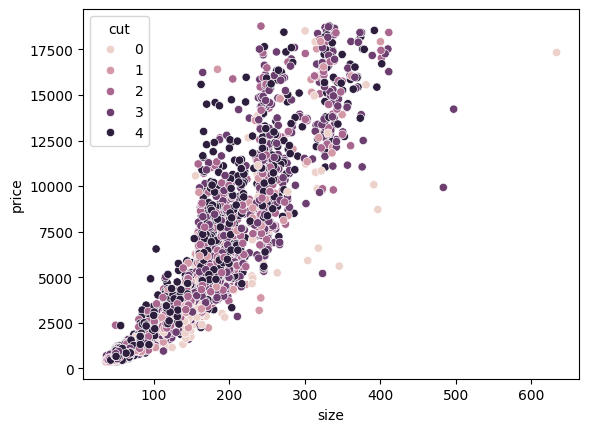

In [105]:
# For this visualization I create an artefact variable by multipling x, y and z
# This is not the real size, because doesn't consider the edges
cleaned_diamonds['size'] = cleaned_diamonds['x']*cleaned_diamonds['y']*cleaned_diamonds['z']
sns.scatterplot(x='size', y='price', hue='cut', data=cleaned_diamonds)

### How much are similar x, y and z?

* X and y seems to match.
* And also z follow the same pattern.

<Axes: xlabel='x', ylabel='price'>

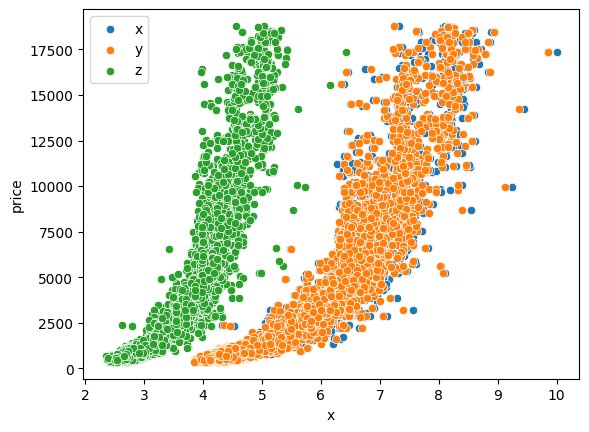

In [106]:
sns.scatterplot(x='x', y='price', label='x', data=cleaned_diamonds)
sns.scatterplot(x='y', y='price', label='y', data=cleaned_diamonds)
sns.scatterplot(x='z', y='price', label='z', data=cleaned_diamonds)

<Axes: xlabel='x', ylabel='y'>

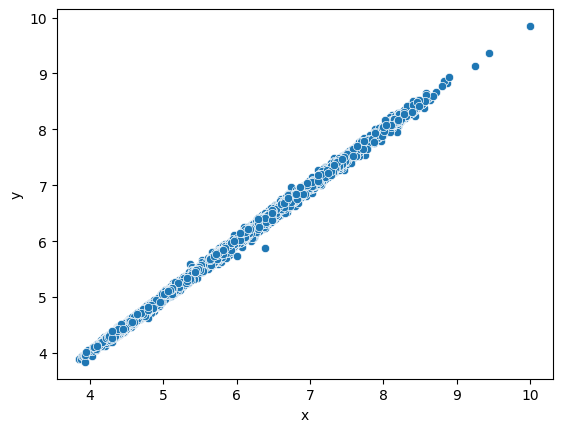

In [107]:
sns.scatterplot(x='x', y='y', data=cleaned_diamonds)

<Axes: xlabel='x', ylabel='z'>

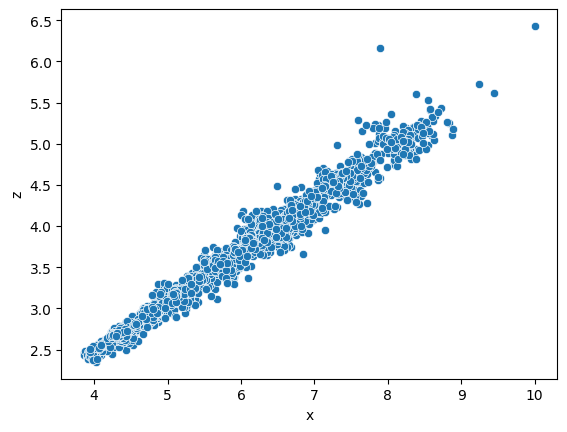

In [108]:
sns.scatterplot(x='x', y='z', data=cleaned_diamonds)

### What is the meaning of table and depth?

#### X vs.table and Z vs. depth

$$ \text{table} = \frac{table_{\text{width}}}{x} \times 100 $$

$$ \text{depth} = \frac{z_{\text{depth}}}{z} \times 100 $$

#### Deductions

I can deduce:

* The best cuts have a lower table
* The best cuts have a depth in the range 60%-63%

<Axes: xlabel='x', ylabel='table'>

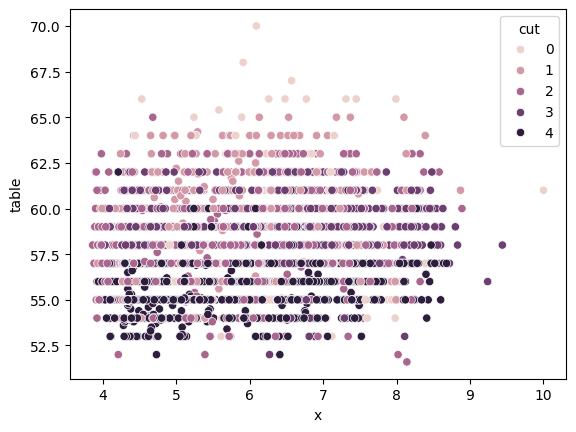

In [109]:
sns.scatterplot(x='x', y='table', hue='cut', data=cleaned_diamonds)

<Axes: xlabel='z', ylabel='depth'>

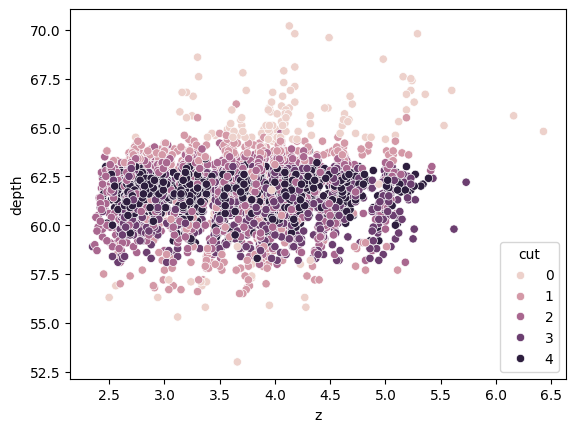

In [110]:
sns.scatterplot(x='z', y='depth', hue='cut', data=cleaned_diamonds)

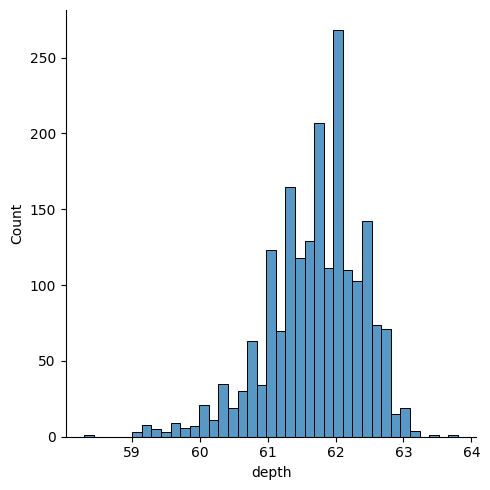

In [111]:
sns.displot(x='depth', data=cleaned_diamonds[cleaned_diamonds['cut'] == 4])

## Ok but, How much do they influence the price?

To the eye there seems to be no correlation.

<Axes: xlabel='table', ylabel='price'>

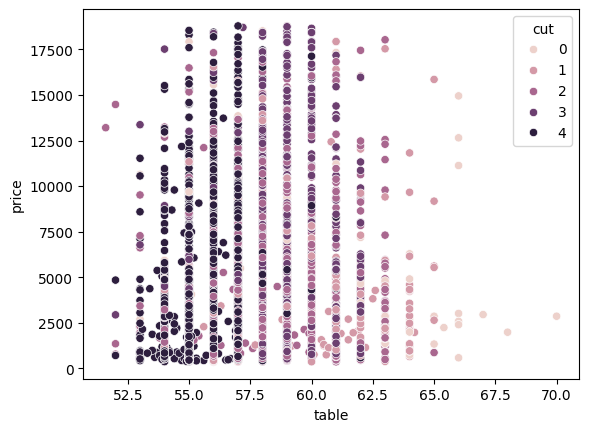

In [112]:
sns.scatterplot(x='table', y='price', hue='cut', data=cleaned_diamonds)

<Axes: xlabel='depth', ylabel='price'>

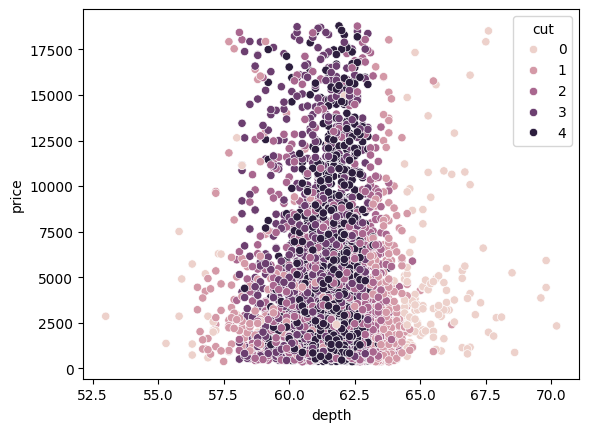

In [113]:
sns.scatterplot(x='depth', y='price', hue='cut', data=cleaned_diamonds)

## Let's dig into the numbers

### How can we statistically demonstrate what we have visualised above?

We can check the correlation between the characteristics, i.e. how much the growth of one value coincides with the growth of another.

I check the correlation between the features of the diamonds.

#### Deductions:

Confirmed the hypothesis that **size** (therefore also x, y, z) is correlated with the **carat**.

<Axes: >

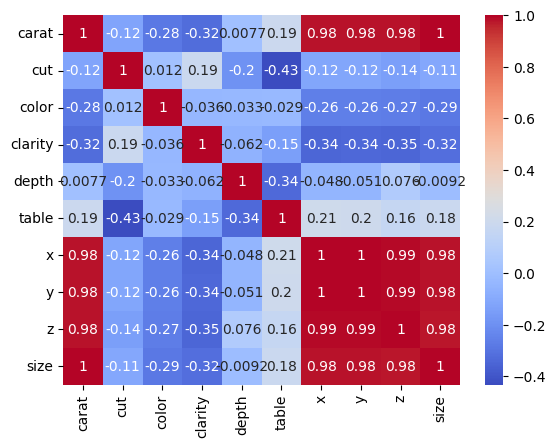

In [114]:
correlation_without_price = cleaned_diamonds.drop(['price'], axis=1)
sns.heatmap(correlation_without_price.corr(), cmap="coolwarm", annot=True)

<Axes: >

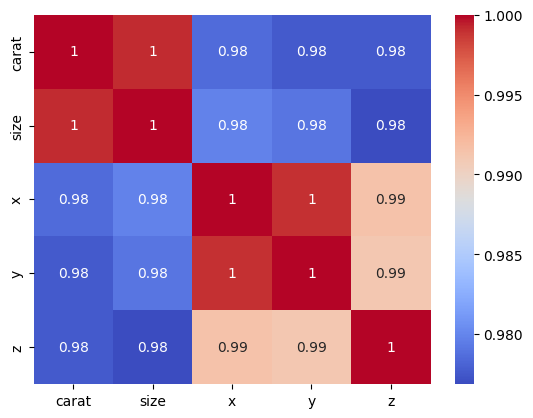

In [115]:
# Zoom
zoom_selection = cleaned_diamonds[['carat', 'size', 'x', 'y', 'z']]
sns.heatmap(zoom_selection.corr(), cmap="coolwarm", annot=True)

## How much correlation is there between features and price?

* As we might expect, there is a great correlation between price and carat, and consequently with size (x, y, z).
* I applied abs() because also a negative correlation can be interesting.
* Notice the ```size``` isn't a real metric, because is not the volume, because it doesn't consider the edges.

In [116]:
cleaned_diamonds.corr()['price'].apply(abs).sort_values(ascending=False)


price      1.000000
size       0.922900
carat      0.920724
y          0.887761
x          0.886901
z          0.882508
color      0.164394
table      0.137271
clarity    0.115272
cut        0.041868
depth      0.024236
Name: price, dtype: float64

## Extras and other ideas

* Use table and depth to estimate a range for the volume

* cut*carat
* table/depth: something like "if the depth is near a certain value"
* table*x/depth*z: maybe the real scalar value is a better estimator than x/z